# Color Space Conversions Analysis
**Experiments:** 10.5, 10.11, 10.15  
**Focus:** Subtractive models (CMY), Perceptual uniformity (L*a*b*), and Compression models (YCbCr).

## Objectives
1. Implement and verify the RGB ↔ CMY round-trip conversion.
2. Analyze the L*a*b* color space components.
3. Explore the YCbCr model used in image compression.

In [1]:
import sys
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath('../../'))

from src.color_utils import rgb_to_cmy
from src.visualization import compare_results, show_image

%matplotlib inline
print("✓ Conversions Library Loaded!")

✓ Conversions Library Loaded!


Round-trip Mean Squared Error: 0.0988


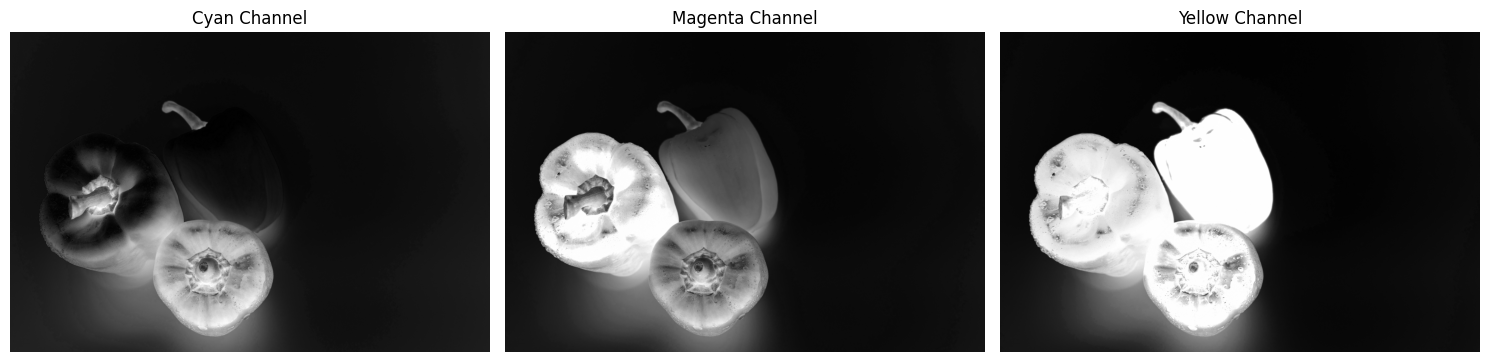

In [2]:
# 1. Load an image (Lena or Peppers works best here)
img_bgr = cv2.imread('../../images/input/peppers.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# 2. RGB to CMY (Using your src function)
cmy_img = rgb_to_cmy(img_rgb)

# 3. CMY to RGB (Inverse: RGB = 1 - CMY)
reconstructed_rgb = (1.0 - cmy_img) * 255
reconstructed_rgb = reconstructed_rgb.astype(np.uint8)

# 4. Round-trip Verification
mse = np.mean((img_rgb - reconstructed_rgb) ** 2)
print(f"Round-trip Mean Squared Error: {mse:.4f}")

# Visualize the CMY channels (Normalized 0-1)
c, m, y = cv2.split(cmy_img)
compare_results([c, m, y], ["Cyan Channel", "Magenta Channel", "Yellow Channel"], cmap='gray')

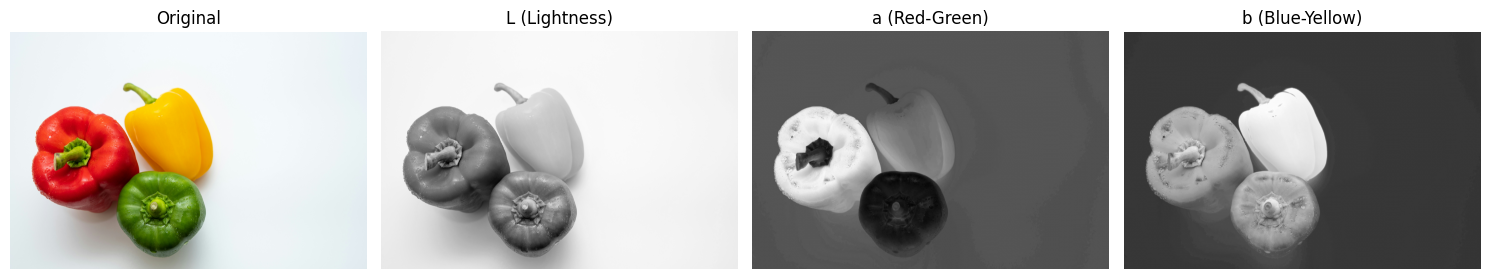

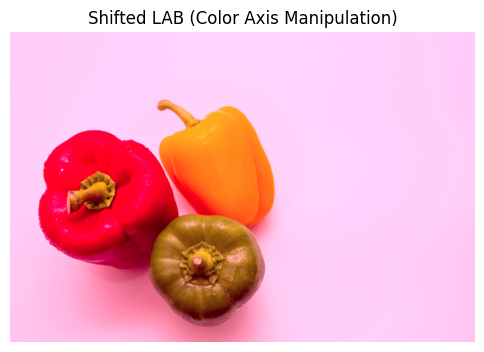

In [3]:
# Convert to LAB
lab_img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2LAB)
l, a, b_chan = cv2.split(lab_img)

# Experiment: Manipulate the 'a' channel (Red-Green)
# Shifting 'a' can turn reds into greens
a_shifted = cv2.add(a, 50) 
lab_shifted = cv2.merge([l, a_shifted, b_chan])
img_shifted = cv2.cvtColor(lab_shifted, cv2.COLOR_LAB2BGR)

compare_results([img_bgr, l, a, b_chan], ["Original", "L (Lightness)", "a (Red-Green)", "b (Blue-Yellow)"])
show_image(img_shifted, "Shifted LAB (Color Axis Manipulation)")

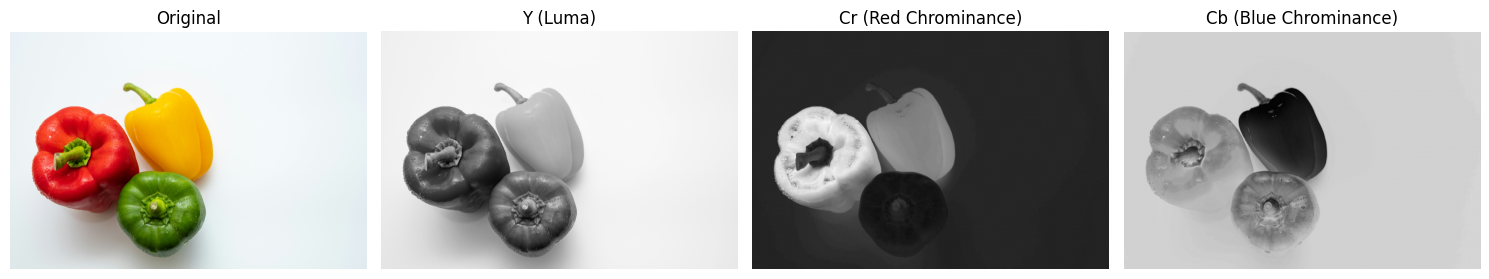

In [4]:
# Convert to YCbCr
ycbcr_img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2YCrCb)
y, cr, cb = cv2.split(ycbcr_img)

# Visualize the separation
compare_results([img_bgr, y, cr, cb], ["Original", "Y (Luma)", "Cr (Red Chrominance)", "Cb (Blue Chrominance)"])

In [1]:
import pandas as pd

data = {
    "Color Space": ["RGB", "HSV", "CMY", "L*a*b*", "YCbCr"],
    "Primary Use": ["Hardware/Displays", "Color Segmentation", "Printing/Ink", "Color Matching", "Video/Compression"],
    "Property": ["Additive", "Perceptual", "Subtractive", "Uniform", "Luma-Chroma Separation"]
}

df = pd.DataFrame(data)
print(df.to_markdown(index=False))

| Color Space   | Primary Use        | Property               |
|:--------------|:-------------------|:-----------------------|
| RGB           | Hardware/Displays  | Additive               |
| HSV           | Color Segmentation | Perceptual             |
| CMY           | Printing/Ink       | Subtractive            |
| L*a*b*        | Color Matching     | Uniform                |
| YCbCr         | Video/Compression  | Luma-Chroma Separation |
